In [203]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [204]:
# Load data
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [205]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [206]:
df.shape

(1460, 81)

In [207]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [209]:
#Check any null column
nul=df.nunique()
nul[nul==0]

Series([], dtype: int64)

In [210]:
#check Missing values of columns
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [211]:
#Drop columns with maximum missing values
df = df.drop(columns=['Alley','PoolQC','Fence', 'MiscFeature'])

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [213]:
#check unique values of FireplaceQu 
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [214]:
#check Missing values of columns
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [215]:
#replace Nan values of FireplaceQu with NA 
df.FireplaceQu = df.FireplaceQu.fillna('NA')

In [216]:
#check missing values
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [217]:
#check unique values of LotFrontage
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [218]:
#check median of LotFrontage
LotFrontage_median = df.LotFrontage.median()
LotFrontage_median

69.0

In [219]:
#impute missing values of LotFrontage with median 
df.LotFrontage = df.LotFrontage.fillna(LotFrontage_median)

In [220]:
#impute missing values of MasVnrArea with median
df.MasVnrArea = df.MasVnrArea.fillna(df.MasVnrArea.median())

In [221]:
#replace Nan values of MasVnrArea with None
df.MasVnrType = df.MasVnrType.fillna('None')

In [222]:
#replace Nan values of BsmtQual with NA
df.BsmtQual = df.BsmtQual.fillna('NA')

In [223]:
#replace Nan values of BsmtCond with NA
df.BsmtCond = df.BsmtCond.fillna('NA')

In [224]:
#replace Nan values of BsmtExposure with No
df.BsmtExposure = df.BsmtExposure.fillna('No')

In [225]:
#replace Nan values of BsmtFinType1 with NA
df.BsmtFinType1 = df.BsmtFinType1.fillna('NA')

In [226]:
#replace Nan values of BsmtFinType2 with NA
df.BsmtFinType2 = df.BsmtFinType2.fillna('NA')

In [227]:
#impute missing values of Electrical with mode due to categorical column
df.Electrical = df.Electrical.fillna(df.Electrical.mode()[0])

In [228]:
#replace Nan values of GarageType with NA
df.GarageType = df.GarageType.fillna('NA')

In [229]:
#replace Nan values of GarageYrBlt with 0
df.GarageYrBlt = df.GarageYrBlt.fillna(0)

In [230]:
#replace Nan values of GarageFinish with NA
df.GarageFinish = df.GarageFinish.fillna('NA')

In [231]:
#replace Nan values of GarageQual with NA
df.GarageQual = df.GarageQual.fillna('NA')

In [232]:
#replace Nan values of GarageFinish with NA
df.GarageQual = df.GarageQual.fillna('NA')

In [233]:
#replace Nan values of GarageCond with NA
df.GarageCond = df.GarageCond.fillna('NA')

In [234]:
#check missing values
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [235]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
df['HouseAge'] = df.YrSold - df.YearBuilt

In [236]:
#Drop YrSold, YearBuilt after HouseAge
df=df.drop(columns=['YrSold', 'YearBuilt'])

In [237]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
df = df.astype(convert_dict)

In [238]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [239]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
df = df.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [240]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
df = df.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [241]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
df = df.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [242]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [243]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
df = df.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [244]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
df = df.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [245]:
df.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [247]:
for c in df.columns:
    if df[c].dtype == np.object :
        print(c)
        print(df[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [248]:
#Drop columns which have moe than 80% bias data
df=df.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond','Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond','PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType','SaleCondition'])

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [250]:
# Object type columns
object_columns = []
for c in df.columns:
    if df[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


In [251]:
# Create dummy variables
MSSubClass_df = pd.get_dummies(df['MSSubClass'],drop_first=True, prefix='MSSubClass')
df = pd.concat([df,MSSubClass_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,1,0,0,0,0,0,0,0,0,0


In [252]:
MSZoning_df = pd.get_dummies(df['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [253]:
house_data = pd.concat([df,MSZoning_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,0,1,0


In [254]:
# Create dummy variables for LotShape
LotShape_df = pd.get_dummies(df['LotShape'],drop_first=True, prefix='LotShape')

In [255]:
df = pd.concat([df,LotShape_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,0,0,0


In [256]:
# Create dummy variables for LotConfig
LotConfig_df = pd.get_dummies(df['LotConfig'],drop_first=True, prefix='LotConfig')

In [257]:
df = pd.concat([df,LotConfig_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,1,0,0


In [258]:
# Create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(df['Neighborhood'],drop_first=True, prefix='Neighborhood')
df = pd.concat([df,Neighborhood_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,1,0,0,0,0,0,0,0,0,0


In [259]:
# Create dummy variables for HouseStyle
HouseStyle_df = pd.get_dummies(df['HouseStyle'],drop_first=True, prefix='HouseStyle')
df = pd.concat([df,HouseStyle_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,1,0,0


In [260]:
# Create dummy variables for RoofStyle
RoofStyle_df = pd.get_dummies(df['RoofStyle'],drop_first=True, prefix='RoofStyle')
df = pd.concat([df,RoofStyle_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,1,0,0,1,0,0,0,0


In [261]:
# Create dummy variables for Exterior1st
Exterior1st_df = pd.get_dummies(df['Exterior1st'],drop_first=True, prefix='Exterior1st')
df = pd.concat([df,Exterior1st_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,1,0,0


In [262]:
# Create dummy variables for Exterior2nd
Exterior2nd_df = pd.get_dummies(df['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
df = pd.concat([df,Exterior2nd_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,1,0,0


In [263]:
# Create dummy variables for MasVnrType
MasVnrType_df = pd.get_dummies(df['MasVnrType'],drop_first=True, prefix='MasVnrType')
df = pd.concat([df,MasVnrType_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,1,0,0,1,0,0


In [264]:
# Create dummy variables for Foundation
Foundation_df = pd.get_dummies(df['Foundation'],drop_first=True, prefix='Foundation')
df = pd.concat([df,Foundation_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,1,0,0,0,1,0,0,0


In [265]:
# Create dummy variables for GarageType
GarageType_df = pd.get_dummies(df['GarageType'],drop_first=True, prefix='GarageType')
df = pd.concat([df,GarageType_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,1,0,0,0,1,0,0,0,0,0


In [266]:
# Create dummy variables for GarageFinish
GarageFinish_df = pd.get_dummies(df['GarageFinish'],drop_first=True, prefix='GarageFinish')
df = pd.concat([df,GarageFinish_df],axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,1,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,1,0,0,0,0,0,0,1,0


In [267]:
df.shape

(1460, 158)

In [268]:
#Drop categorical variables after ceating dummy varaibles
df=df.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 145 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(39), uint8(103)
memory usage: 626.0 KB


In [270]:
# Preparing data for Modeling
df_train,df_test = train_test_split(df,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 145)
(439, 145)


In [271]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,69.569050,10489.964740,6.093046,5.580803,1984.984329,104.489716,3.399608,3.479922,1.691479,3.593536,...,0.001959,0.589618,0.011753,0.063663,0.006856,0.269344,0.055828,0.055828,0.278159,0.421156
std,22.090553,10308.062725,1.399636,1.092121,20.604962,187.341089,0.571342,0.900348,1.058956,2.114914,...,0.044237,0.492144,0.107826,0.244271,0.082557,0.443836,0.229701,0.229701,0.448312,0.493986
min,21.000000,1477.000000,1.000000,1.000000,1950.000000,0.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7449.000000,5.000000,5.000000,1967.000000,0.000000,3.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9505.000000,6.000000,5.000000,1994.000000,0.000000,3.000000,4.000000,1.000000,4.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,11512.000000,7.000000,6.000000,2004.000000,158.000000,4.000000,4.000000,3.000000,6.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5.000000,5.000000,4.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [272]:
# Rescaling numeric
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,...,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,...,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,0,1
1416,-0.433386,0.082504,-1.496155,0.384025,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0,0,0,0,0,1,0,0,0,1
390,-0.886290,-0.202365,-0.781333,2.216221,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.280781,...,0,0,0,0,0,1,0,0,0,1


In [273]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,-2.370506e-17,-9.108912e-17,-2.217184e-16,1.241797e-16,-8.375061e-16,-9.416779e-17,4.334328e-16,2.710858e-16,1.628907e-16,1.346186e-16,...,0.001959,0.589618,0.011753,0.063663,0.006856,0.269344,0.055828,0.055828,0.278159,0.421156
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.044237,0.492144,0.107826,0.244271,0.082557,0.443836,0.229701,0.229701,0.448312,0.493986
min,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.698692e+00,-5.580245e-01,-2.450888e+00,-3.866981e+00,-6.533017e-01,-1.699973e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-8.732432e-01,-5.580245e-01,-6.997636e-01,-5.333016e-01,-6.533017e-01,-1.226909e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,4.377630e-01,-5.580245e-01,-6.997636e-01,5.779248e-01,-6.533017e-01,1.922837e-01,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.818411e-01,9.919770e-02,6.483103e-01,3.840254e-01,9.233208e-01,2.857702e-01,1.051361e+00,5.779248e-01,1.236276e+00,1.138412e+00,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.102509e+01,1.987332e+01,2.792775e+00,3.132319e+00,1.214656e+00,7.986733e+00,2.802485e+00,1.689151e+00,2.181065e+00,1.138412e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [274]:
#Training the Model
y_train = df_train.pop('SalePrice')
X_train = df_train

In [275]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=144)

In [276]:
# RFE - Top 35 features

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 35)
rfe = rfe.fit(X_train,y_train)

In [277]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 45),
 ('LotArea', False, 9),
 ('OverallQual', True, 1),
 ('OverallCond', False, 15),
 ('YearRemodAdd', False, 73),
 ('MasVnrArea', False, 33),
 ('ExterQual', False, 57),
 ('BsmtQual', False, 36),
 ('BsmtExposure', False, 3),
 ('BsmtFinType1', False, 7),
 ('BsmtFinSF1', False, 18),
 ('BsmtFinSF2', False, 21),
 ('BsmtUnfSF', False, 17),
 ('TotalBsmtSF', False, 20),
 ('HeatingQC', False, 107),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 19),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 16),
 ('BsmtHalfBath', False, 40),
 ('FullBath', False, 34),
 ('HalfBath', False, 61),
 ('BedroomAbvGr', False, 103),
 ('KitchenAbvGr', False, 83),
 ('KitchenQual', False, 43),
 ('TotRmsAbvGrd', False, 104),
 ('Fireplaces', False, 80),
 ('FireplaceQu', False, 50),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 105),
 ('GarageArea', False, 8),
 ('WoodDeckSF', False, 67),
 ('OpenPorchSF', False, 108),
 ('EnclosedPorch', False, 99),
 ('3SsnPorch', Fa

In [278]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt',
       'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_190',
       'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_Wd Shng', 'Foundation_Stone', 'GarageType_CarPort',
       'GarageType_NA', 'GarageFinish_NA'],
      dtype='object')

In [279]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       ...
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=109)

In [280]:
# Building model
#Creating X_train with RFE selected columns
X_train_rfe = X_train[col]

In [281]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [282]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [283]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     120.5
Date:                Wed, 22 May 2024   Prob (F-statistic):          2.93e-319
Time:                        23:00:42   Log-Likelihood:                -12139.
No. Observations:                1021   AIC:                         2.435e+04
Df Residuals:                     987   BIC:                         2.451e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.375e+05   6815.115     20.182      0.000    1.24e+05    1.51e+05
OverallQual           2.689e+04   1874.690     14.345      0.000    2.32e+04    3.06e+04
1stFlrSF              4.252e+04   9848.815      4.318      0.000    2.32e+04    6.19e+04
2ndFlrSF              3.579e+04   1.07e+04      3.342      0.001    1.48e+04    5.68e+04
GrLivArea             -1.86e+04   1.29e+04     -1.443      0.149   -4.39e+04    6704.693
GarageYrBlt           1.594e+05   2.77e+04      5.754      0.000    1.05e+05    2.14e+05
MSSubClass_75        -1.404e+04   1.19e+04     -1.180      0.238   -3.74e+04    9313.349
MSSubClass_90        -2.434e+04   6273.306     -3.879      0.000   -3.66e+04    -1.2e+04
MSSubClass_160       -4.075e+04   6254.056     -6.517      0.000    -5.3e+04   -2.85e+04
MSSubClass_190       -1.474e+04   7614.774     -1.936      0.053   -2.97e+04     199.320
LotShape_IR3         -1.878e+04   1.22e+04     -1.536      0.125   -4.28e+04    5205.672
LotConfig_FR3        -1.552e+04   2.09e+04     -0.742      0.458   -5.66e+04    2.55e+04
Neighborhood_ClearCr  3.008e+04   8231.513      3.654      0.000    1.39e+04    4.62e+04
Neighborhood_NoRidge  6.296e+04   6993.854      9.003      0.000    4.92e+04    7.67e+04
Neighborhood_NridgHt  5.526e+04   5595.581      9.876      0.000    4.43e+04    6.62e+04
Neighborhood_Somerst  2.729e+04   5478.018      4.982      0.000    1.65e+04     3.8e+04
Neighborhood_StoneBr  3.127e+04   1.04e+04      2.995      0.003    1.08e+04    5.18e+04
Neighborhood_Veenker  3.802e+04   1.11e+04      3.429      0.001    1.63e+04    5.98e+04
Exterior1st_AsphShn  -2.029e+04   1.83e+04     -1.109      0.268   -5.62e+04    1.56e+04
Exterior1st_BrkComm  -6.609e+04   3.34e+04     -1.981      0.048   -1.32e+05    -620.241
Exterior1st_BrkFace   1.821e+04   6996.833      2.602      0.009    4478.455    3.19e+04
Exterior1st_CBlock   -1.245e+04    3.6e+04     -0.346      0.729    -8.3e+04    5.81e+04
Exterior1st_CemntBd  -3.967e+04   2.56e+04     -1.547      0.122      -9e+04    1.06e+04
Exterior1st_ImStucc  -6.743e+04   3.89e+04     -1.735      0.083   -1.44e+05    8820.694
Exterior1st_Stone    -1.267e+04   2.85e+04     -0.445      0.656   -6.86e+04    4.32e+04
Exterior2nd_AsphShn  -2.029e+04   1.83e+04     -1.109      0.268   -5.62e+04    1.56e+04
Exterior2nd_Brk Cmn   2.895e+04   2.16e+04      1.342      0.180   -1.34e+04    7.13e+04
Exterior2nd_CmentBd   4.865e+04   2.57e+04      1.896      0.058   -1714.509     9.9e+04
Exterior2nd_ImStucc   3.149e+04   1.37e+04      2.295      0.022    4566.926    5.84e+04
Exterior2nd_Stone     2.538e+04   2.34e+04      1.083      0.279   -2.06e+04    7.14e+04
Exterior2nd_Stucco   -2.335e+04   8424.118     -2.771      0.006   -3.99e+04   -6814.442
Exterior2nd_Wd Shng  -1.539e+04   6649.401     -2.315    

In [284]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
18,Exterior1st_AsphShn,inf
25,Exterior2nd_AsphShn,inf
34,GarageType_NA,inf
35,GarageFinish_NA,inf
5,GarageYrBlt,609.20
4,GrLivArea,132.09
3,2ndFlrSF,91.08
2,1stFlrSF,77.03
0,const,36.88
27,Exterior2nd_CmentBd,18.27


In [285]:
# GarageType has higher P-Value hence, dropping
X_train_new = X_train_rfe.drop(['GarageType_NA'],axis=1)

In [286]:
X_train_new.columns

Index(['const', 'OverallQual', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageYrBlt', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_160',
       'MSSubClass_190', 'LotShape_IR3', 'LotConfig_FR3',
       'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_Stone',
       'GarageType_CarPort', 'GarageFinish_NA'],
      dtype='object')

In [287]:
# Rebuild the model
X_train_lm = sm.add_constant(X_train_new)

In [288]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [289]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     120.5
Date:                Wed, 22 May 2024   Prob (F-statistic):          2.93e-319
Time:                        23:00:43   Log-Likelihood:                -12139.
No. Observations:                1021   AIC:                         2.435e+04
Df Residuals:                     987   BIC:                         2.451e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.375e+05   6815.115     20.182      0.000    1.24e+05    1.51e+05
OverallQual           2.689e+04   1874.690     14.345      0.000    2.32e+04    3.06e+04
1stFlrSF              4.252e+04   9848.815      4.318      0.000    2.32e+04    6.19e+04
2ndFlrSF              3.579e+04   1.07e+04      3.342      0.001    1.48e+04    5.68e+04
GrLivArea             -1.86e+04   1.29e+04     -1.443      0.149   -4.39e+04    6704.693
GarageYrBlt           1.594e+05   2.77e+04      5.754      0.000    1.05e+05    2.14e+05
MSSubClass_75        -1.404e+04   1.19e+04     -1.180      0.238   -3.74e+04    9313.349
MSSubClass_90        -2.434e+04   6273.306     -3.879      0.000   -3.66e+04    -1.2e+04
MSSubClass_160       -4.075e+04   6254.056     -6.517      0.000    -5.3e+04   -2.85e+04
MSSubClass_190       -1.474e+04   7614.774     -1.936      0.053   -2.97e+04     199.320
LotShape_IR3         -1.878e+04   1.22e+04     -1.536      0.125   -4.28e+04    5205.672
LotConfig_FR3        -1.552e+04   2.09e+04     -0.742      0.458   -5.66e+04    2.55e+04
Neighborhood_ClearCr  3.008e+04   8231.513      3.654      0.000    1.39e+04    4.62e+04
Neighborhood_NoRidge  6.296e+04   6993.854      9.003      0.000    4.92e+04    7.67e+04
Neighborhood_NridgHt  5.526e+04   5595.581      9.876      0.000    4.43e+04    6.62e+04
Neighborhood_Somerst  2.729e+04   5478.018      4.982      0.000    1.65e+04     3.8e+04
Neighborhood_StoneBr  3.127e+04   1.04e+04      2.995      0.003    1.08e+04    5.18e+04
Neighborhood_Veenker  3.802e+04   1.11e+04      3.429      0.001    1.63e+04    5.98e+04
Exterior1st_AsphShn  -2.029e+04   1.83e+04     -1.109      0.268   -5.62e+04    1.56e+04
Exterior1st_BrkComm  -6.609e+04   3.34e+04     -1.981      0.048   -1.32e+05    -620.241
Exterior1st_BrkFace   1.821e+04   6996.833      2.602      0.009    4478.455    3.19e+04
Exterior1st_CBlock   -1.245e+04    3.6e+04     -0.346      0.729    -8.3e+04    5.81e+04
Exterior1st_CemntBd  -3.967e+04   2.56e+04     -1.547      0.122      -9e+04    1.06e+04
Exterior1st_ImStucc  -6.743e+04   3.89e+04     -1.735      0.083   -1.44e+05    8820.694
Exterior1st_Stone    -1.267e+04   2.85e+04     -0.445      0.656   -6.86e+04    4.32e+04
Exterior2nd_AsphShn  -2.029e+04   1.83e+04     -1.109      0.268   -5.62e+04    1.56e+04
Exterior2nd_Brk Cmn   2.895e+04   2.16e+04      1.342      0.180   -1.34e+04    7.13e+04
Exterior2nd_CmentBd   4.865e+04   2.57e+04      1.896      0.058   -1714.509     9.9e+04
Exterior2nd_ImStucc   3.149e+04   1.37e+04      2.295      0.022    4566.926    5.84e+04
Exterior2nd_Stone     2.538e+04   2.34e+04      1.083      0.279   -2.06e+04    7.14e+04
Exterior2nd_Stucco   -2.335e+04   8424.118     -2.771      0.006   -3.99e+04   -6814.442
Exterior2nd_Wd Shng  -1.539e+04   6649.401     -2.315    

In [290]:
# Exterior1st_CBlock has higher P-Value hence, dropping
X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)

In [291]:
# Rebuild the model
X_train_lm = sm.add_constant(X_train_new)

In [292]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [293]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     124.4
Date:                Wed, 22 May 2024   Prob (F-statistic):          2.76e-320
Time:                        23:00:44   Log-Likelihood:                -12139.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                     988   BIC:                         2.451e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.376e+05   6811.994     20.193      0.000    1.24e+05    1.51e+05
OverallQual           2.693e+04   1870.618     14.397      0.000    2.33e+04    3.06e+04
1stFlrSF               4.25e+04   9844.238      4.318      0.000    2.32e+04    6.18e+04
2ndFlrSF              3.576e+04   1.07e+04      3.340      0.001    1.48e+04    5.68e+04
GrLivArea            -1.858e+04   1.29e+04     -1.442      0.150   -4.39e+04    6713.643
GarageYrBlt           1.592e+05   2.77e+04      5.753      0.000    1.05e+05    2.14e+05
MSSubClass_75        -1.403e+04   1.19e+04     -1.179      0.239   -3.74e+04    9313.499
MSSubClass_90         -2.43e+04   6269.720     -3.876      0.000   -3.66e+04    -1.2e+04
MSSubClass_160       -4.073e+04   6250.818     -6.516      0.000    -5.3e+04   -2.85e+04
MSSubClass_190       -1.471e+04   7610.652     -1.932      0.054   -2.96e+04     227.680
LotShape_IR3         -1.877e+04   1.22e+04     -1.536      0.125   -4.27e+04    5206.859
LotConfig_FR3        -1.551e+04   2.09e+04     -0.742      0.458   -5.65e+04    2.55e+04
Neighborhood_ClearCr   3.01e+04   8227.624      3.658      0.000     1.4e+04    4.62e+04
Neighborhood_NoRidge  6.296e+04   6990.735      9.007      0.000    4.92e+04    7.67e+04
Neighborhood_NridgHt  5.523e+04   5592.289      9.876      0.000    4.43e+04    6.62e+04
Neighborhood_Somerst  2.728e+04   5475.407      4.982      0.000    1.65e+04     3.8e+04
Neighborhood_StoneBr  3.123e+04   1.04e+04      2.993      0.003    1.08e+04    5.17e+04
Neighborhood_Veenker  3.801e+04   1.11e+04      3.430      0.001    1.63e+04    5.98e+04
Exterior1st_AsphShn   -2.03e+04   1.83e+04     -1.110      0.267   -5.62e+04    1.56e+04
Exterior1st_BrkComm  -6.604e+04   3.33e+04     -1.980      0.048   -1.31e+05    -595.566
Exterior1st_BrkFace   1.821e+04   6993.714      2.604      0.009    4486.254    3.19e+04
Exterior1st_CemntBd  -3.961e+04   2.56e+04     -1.546      0.122   -8.99e+04    1.07e+04
Exterior1st_ImStucc  -6.747e+04   3.88e+04     -1.737      0.083   -1.44e+05    8742.001
Exterior1st_Stone     -1.27e+04   2.85e+04     -0.446      0.656   -6.86e+04    4.32e+04
Exterior2nd_AsphShn   -2.03e+04   1.83e+04     -1.110      0.267   -5.62e+04    1.56e+04
Exterior2nd_Brk Cmn   2.895e+04   2.16e+04      1.343      0.180   -1.34e+04    7.13e+04
Exterior2nd_CmentBd    4.86e+04   2.57e+04      1.895      0.058   -1737.973    9.89e+04
Exterior2nd_ImStucc    3.15e+04   1.37e+04      2.296      0.022    4581.945    5.84e+04
Exterior2nd_Stone     2.541e+04   2.34e+04      1.085      0.278   -2.06e+04    7.14e+04
Exterior2nd_Stucco   -2.332e+04   8420.092     -2.770      0.006   -3.98e+04   -6798.892
Exterior2nd_Wd Shng  -1.538e+04   6646.370     -2.314      0.021   -2.84e+04   -2338.805
Foundation_Stone      1.877e+04   2.12e+04      0.885    

In [294]:
# GrLivArea has higher P-Value hence, dropping
X_train_new = X_train_new.drop(['GrLivArea'],axis=1)

In [295]:
# Rebuild the model
X_train_lm = sm.add_constant(X_train_new)

In [296]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [297]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 22 May 2024   Prob (F-statistic):          6.78e-321
Time:                        23:00:45   Log-Likelihood:                -12140.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                     989   BIC:                         2.450e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.376e+05   6815.553     20.192      0.000    1.24e+05    1.51e+05
OverallQual           2.703e+04   1870.328     14.453      0.000    2.34e+04    3.07e+04
1stFlrSF               2.85e+04   1592.694     17.894      0.000    2.54e+04    3.16e+04
2ndFlrSF              2.046e+04   1401.704     14.595      0.000    1.77e+04    2.32e+04
GarageYrBlt           1.593e+05   2.77e+04      5.751      0.000    1.05e+05    2.14e+05
MSSubClass_75        -1.679e+04   1.17e+04     -1.430      0.153   -3.98e+04    6258.479
MSSubClass_90        -2.376e+04   6261.708     -3.794      0.000    -3.6e+04   -1.15e+04
MSSubClass_160       -4.084e+04   6253.741     -6.531      0.000   -5.31e+04   -2.86e+04
MSSubClass_190       -1.517e+04   7608.100     -1.994      0.046   -3.01e+04    -237.456
LotShape_IR3         -1.853e+04   1.22e+04     -1.516      0.130   -4.25e+04    5458.151
LotConfig_FR3        -1.539e+04   2.09e+04     -0.736      0.462   -5.64e+04    2.57e+04
Neighborhood_ClearCr  2.951e+04   8221.888      3.589      0.000    1.34e+04    4.56e+04
Neighborhood_NoRidge  6.317e+04   6993.081      9.033      0.000    4.94e+04    7.69e+04
Neighborhood_NridgHt  5.525e+04   5595.323      9.874      0.000    4.43e+04    6.62e+04
Neighborhood_Somerst  2.718e+04   5477.929      4.961      0.000    1.64e+04    3.79e+04
Neighborhood_StoneBr  3.119e+04   1.04e+04      2.987      0.003    1.07e+04    5.17e+04
Neighborhood_Veenker  3.803e+04   1.11e+04      3.430      0.001    1.63e+04    5.98e+04
Exterior1st_AsphShn  -1.974e+04   1.83e+04     -1.079      0.281   -5.56e+04    1.62e+04
Exterior1st_BrkComm  -6.605e+04   3.34e+04     -1.979      0.048   -1.32e+05    -568.659
Exterior1st_BrkFace    1.84e+04   6996.283      2.630      0.009    4671.162    3.21e+04
Exterior1st_CemntBd  -3.935e+04   2.56e+04     -1.535      0.125   -8.97e+04     1.1e+04
Exterior1st_ImStucc  -6.779e+04   3.89e+04     -1.745      0.081   -1.44e+05    8464.763
Exterior1st_Stone    -1.221e+04   2.85e+04     -0.429      0.668   -6.81e+04    4.37e+04
Exterior2nd_AsphShn  -1.974e+04   1.83e+04     -1.079      0.281   -5.56e+04    1.62e+04
Exterior2nd_Brk Cmn   2.916e+04   2.16e+04      1.352      0.177   -1.32e+04    7.15e+04
Exterior2nd_CmentBd   4.872e+04   2.57e+04      1.898      0.058   -1639.136    9.91e+04
Exterior2nd_ImStucc   3.165e+04   1.37e+04      2.307      0.021    4725.403    5.86e+04
Exterior2nd_Stone     2.505e+04   2.34e+04      1.069      0.285   -2.09e+04     7.1e+04
Exterior2nd_Stucco   -2.363e+04   8421.896     -2.806      0.005   -4.02e+04   -7107.399
Exterior2nd_Wd Shng  -1.503e+04   6645.402     -2.261      0.024   -2.81e+04   -1984.777
Foundation_Stone       1.91e+04   2.12e+04      0.901      0.368   -2.25e+04    6.07e+04
GarageType_CarPort   -7356.0045   1.39e+04     -0.528    

In [298]:
# Exterior1st_AsphShn has higher P-Value hence, dropping
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

In [299]:
# Rebuild the model
X_train_lm = sm.add_constant(X_train_new)

In [300]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [301]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 22 May 2024   Prob (F-statistic):          6.78e-321
Time:                        23:00:46   Log-Likelihood:                -12140.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                     989   BIC:                         2.450e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.376e+05   6815.553     20.192      0.000    1.24e+05    1.51e+05
OverallQual           2.703e+04   1870.328     14.453      0.000    2.34e+04    3.07e+04
1stFlrSF               2.85e+04   1592.694     17.894      0.000    2.54e+04    3.16e+04
2ndFlrSF              2.046e+04   1401.704     14.595      0.000    1.77e+04    2.32e+04
GarageYrBlt           1.593e+05   2.77e+04      5.751      0.000    1.05e+05    2.14e+05
MSSubClass_75        -1.679e+04   1.17e+04     -1.430      0.153   -3.98e+04    6258.479
MSSubClass_90        -2.376e+04   6261.708     -3.794      0.000    -3.6e+04   -1.15e+04
MSSubClass_160       -4.084e+04   6253.741     -6.531      0.000   -5.31e+04   -2.86e+04
MSSubClass_190       -1.517e+04   7608.100     -1.994      0.046   -3.01e+04    -237.456
LotShape_IR3         -1.853e+04   1.22e+04     -1.516      0.130   -4.25e+04    5458.151
LotConfig_FR3        -1.539e+04   2.09e+04     -0.736      0.462   -5.64e+04    2.57e+04
Neighborhood_ClearCr  2.951e+04   8221.888      3.589      0.000    1.34e+04    4.56e+04
Neighborhood_NoRidge  6.317e+04   6993.081      9.033      0.000    4.94e+04    7.69e+04
Neighborhood_NridgHt  5.525e+04   5595.323      9.874      0.000    4.43e+04    6.62e+04
Neighborhood_Somerst  2.718e+04   5477.929      4.961      0.000    1.64e+04    3.79e+04
Neighborhood_StoneBr  3.119e+04   1.04e+04      2.987      0.003    1.07e+04    5.17e+04
Neighborhood_Veenker  3.803e+04   1.11e+04      3.430      0.001    1.63e+04    5.98e+04
Exterior1st_BrkComm  -6.605e+04   3.34e+04     -1.979      0.048   -1.32e+05    -568.659
Exterior1st_BrkFace    1.84e+04   6996.283      2.630      0.009    4671.162    3.21e+04
Exterior1st_CemntBd  -3.935e+04   2.56e+04     -1.535      0.125   -8.97e+04     1.1e+04
Exterior1st_ImStucc  -6.779e+04   3.89e+04     -1.745      0.081   -1.44e+05    8464.763
Exterior1st_Stone    -1.221e+04   2.85e+04     -0.429      0.668   -6.81e+04    4.37e+04
Exterior2nd_AsphShn  -3.949e+04   3.66e+04     -1.079      0.281   -1.11e+05    3.23e+04
Exterior2nd_Brk Cmn   2.916e+04   2.16e+04      1.352      0.177   -1.32e+04    7.15e+04
Exterior2nd_CmentBd   4.872e+04   2.57e+04      1.898      0.058   -1639.136    9.91e+04
Exterior2nd_ImStucc   3.165e+04   1.37e+04      2.307      0.021    4725.403    5.86e+04
Exterior2nd_Stone     2.505e+04   2.34e+04      1.069      0.285   -2.09e+04     7.1e+04
Exterior2nd_Stucco   -2.363e+04   8421.896     -2.806      0.005   -4.02e+04   -7107.399
Exterior2nd_Wd Shng  -1.503e+04   6645.402     -2.261      0.024   -2.81e+04   -1984.777
Foundation_Stone       1.91e+04   2.12e+04      0.901      0.368   -2.25e+04    6.07e+04
GarageType_CarPort   -7356.0045   1.39e+04     -0.528      0.597   -3.47e+04       2e+04
GarageFinish_NA       6.816e+05    1.2e+05      5.696    

In [302]:
X_train_new.shape

(1021, 32)

In [303]:
#check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,GarageYrBlt,609.12
31,GarageFinish_NA,599.31
0,const,36.88
24,Exterior2nd_CmentBd,18.27
19,Exterior1st_CemntBd,18.22
1,OverallQual,2.78
2,1stFlrSF,2.01
23,Exterior2nd_Brk Cmn,1.80
17,Exterior1st_BrkComm,1.73
3,2ndFlrSF,1.56


In [304]:
# BsmtFinSF2 has higher VIF hence, dropping
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

In [305]:
# Rebuild the model
X_train_lm = sm.add_constant(X_train_new)

In [306]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [307]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     132.2
Date:                Wed, 22 May 2024   Prob (F-statistic):          1.88e-321
Time:                        23:00:50   Log-Likelihood:                -12141.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                     990   BIC:                         2.450e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.379e+05   6817.528     20.230      0.000    1.25e+05    1.51e+05
OverallQual           2.726e+04   1865.628     14.612      0.000    2.36e+04    3.09e+04
1stFlrSF              2.846e+04   1593.581     17.859      0.000    2.53e+04    3.16e+04
2ndFlrSF               2.04e+04   1402.161     14.549      0.000    1.76e+04    2.32e+04
GarageYrBlt            1.58e+05   2.77e+04      5.704      0.000    1.04e+05    2.12e+05
MSSubClass_75        -1.699e+04   1.18e+04     -1.446      0.149   -4.01e+04    6075.099
MSSubClass_90        -2.359e+04   6265.077     -3.766      0.000   -3.59e+04   -1.13e+04
MSSubClass_160       -4.084e+04   6258.023     -6.526      0.000   -5.31e+04   -2.86e+04
MSSubClass_190       -1.503e+04   7612.781     -1.974      0.049      -3e+04     -90.722
LotShape_IR3         -1.852e+04   1.22e+04     -1.514      0.130   -4.25e+04    5487.319
LotConfig_FR3        -1.532e+04   2.09e+04     -0.732      0.464   -5.64e+04    2.58e+04
Neighborhood_ClearCr  2.956e+04   8227.443      3.593      0.000    1.34e+04    4.57e+04
Neighborhood_NoRidge  6.304e+04   6997.385      9.010      0.000    4.93e+04    7.68e+04
Neighborhood_NridgHt  5.495e+04   5595.708      9.820      0.000     4.4e+04    6.59e+04
Neighborhood_Somerst  2.694e+04   5479.486      4.916      0.000    1.62e+04    3.77e+04
Neighborhood_StoneBr  3.066e+04   1.04e+04      2.937      0.003    1.02e+04    5.12e+04
Neighborhood_Veenker  3.796e+04   1.11e+04      3.421      0.001    1.62e+04    5.97e+04
Exterior1st_BrkComm  -6.582e+04   3.34e+04     -1.971      0.049   -1.31e+05    -299.015
Exterior1st_BrkFace   1.836e+04   7001.035      2.623      0.009    4626.361    3.21e+04
Exterior1st_ImStucc  -6.791e+04   3.89e+04     -1.746      0.081   -1.44e+05    8397.176
Exterior1st_Stone    -1.239e+04   2.85e+04     -0.435      0.664   -6.83e+04    4.35e+04
Exterior2nd_AsphShn  -3.955e+04   3.66e+04     -1.080      0.280   -1.11e+05    3.23e+04
Exterior2nd_Brk Cmn   2.918e+04   2.16e+04      1.352      0.177   -1.32e+04    7.15e+04
Exterior2nd_CmentBd    1.05e+04   6205.116      1.692      0.091   -1680.246    2.27e+04
Exterior2nd_ImStucc   3.164e+04   1.37e+04      2.304      0.021    4694.542    5.86e+04
Exterior2nd_Stone     2.521e+04   2.34e+04      1.075      0.283   -2.08e+04    7.12e+04
Exterior2nd_Stucco   -2.361e+04   8427.649     -2.802      0.005   -4.01e+04   -7073.084
Exterior2nd_Wd Shng  -1.502e+04   6649.951     -2.259      0.024   -2.81e+04   -1971.378
Foundation_Stone      1.901e+04   2.12e+04      0.896      0.371   -2.26e+04    6.07e+04
GarageType_CarPort   -7217.0425   1.39e+04     -0.518      0.604   -3.46e+04    2.01e+04
GarageFinish_NA       6.762e+05    1.2e+05      5.649      0.000    4.41e+05    9.11e+05
=========================================================

In [308]:
# Exterior2nd_AsphShn has higher p-value hence, dropping
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)

In [309]:
# Rebuild the model
X_train_lm = sm.add_constant(X_train_new)

In [310]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [311]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     136.7
Date:                Wed, 22 May 2024   Prob (F-statistic):          2.87e-322
Time:                        23:00:53   Log-Likelihood:                -12142.
No. Observations:                1021   AIC:                         2.434e+04
Df Residuals:                     991   BIC:                         2.449e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.378e+05   6817.257     20.213      0.000    1.24e+05    1.51e+05
OverallQual           2.724e+04   1865.633     14.599      0.000    2.36e+04    3.09e+04
1stFlrSF               2.84e+04   1592.691     17.831      0.000    2.53e+04    3.15e+04
2ndFlrSF              2.041e+04   1402.233     14.557      0.000    1.77e+04    2.32e+04
GarageYrBlt           1.586e+05   2.77e+04      5.723      0.000    1.04e+05    2.13e+05
MSSubClass_75        -1.696e+04   1.18e+04     -1.443      0.149      -4e+04    6109.704
MSSubClass_90        -2.445e+04   6215.472     -3.933      0.000   -3.66e+04   -1.22e+04
MSSubClass_160       -4.093e+04   6257.952     -6.541      0.000   -5.32e+04   -2.87e+04
MSSubClass_190       -1.489e+04   7612.342     -1.956      0.051   -2.98e+04      46.935
LotShape_IR3         -1.849e+04   1.22e+04     -1.511      0.131   -4.25e+04    5516.210
LotConfig_FR3        -1.533e+04   2.09e+04     -0.732      0.464   -5.64e+04    2.57e+04
Neighborhood_ClearCr   2.96e+04   8228.059      3.597      0.000    1.35e+04    4.57e+04
Neighborhood_NoRidge  6.308e+04   6997.892      9.014      0.000    4.93e+04    7.68e+04
Neighborhood_NridgHt    5.5e+04   5595.980      9.828      0.000     4.4e+04     6.6e+04
Neighborhood_Somerst  2.693e+04   5479.938      4.914      0.000    1.62e+04    3.77e+04
Neighborhood_StoneBr  3.071e+04   1.04e+04      2.941      0.003    1.02e+04    5.12e+04
Neighborhood_Veenker  3.795e+04   1.11e+04      3.420      0.001    1.62e+04    5.97e+04
Exterior1st_BrkComm  -6.587e+04   3.34e+04     -1.973      0.049   -1.31e+05    -342.963
Exterior1st_BrkFace   1.852e+04   7000.246      2.645      0.008    4777.993    3.23e+04
Exterior1st_ImStucc    -6.8e+04   3.89e+04     -1.749      0.081   -1.44e+05    8313.900
Exterior1st_Stone    -1.246e+04   2.85e+04     -0.437      0.662   -6.84e+04    4.35e+04
Exterior2nd_Brk Cmn   2.921e+04   2.16e+04      1.353      0.176   -1.32e+04    7.16e+04
Exterior2nd_CmentBd   1.059e+04   6205.041      1.707      0.088   -1587.095    2.28e+04
Exterior2nd_ImStucc   3.178e+04   1.37e+04      2.314      0.021    4832.673    5.87e+04
Exterior2nd_Stone     2.577e+04   2.34e+04      1.099      0.272   -2.02e+04    7.18e+04
Exterior2nd_Stucco   -2.352e+04   8427.930     -2.791      0.005   -4.01e+04   -6980.769
Exterior2nd_Wd Shng  -1.495e+04   6650.140     -2.247      0.025    -2.8e+04   -1895.143
Foundation_Stone      1.891e+04   2.12e+04      0.891      0.373   -2.27e+04    6.06e+04
GarageType_CarPort   -6892.8804   1.39e+04     -0.495      0.621   -3.42e+04    2.04e+04
GarageFinish_NA       6.778e+05    1.2e+05      5.663      0.000    4.43e+05    9.13e+05
==============================================================================
Omnibus:                      263.200   Durbin-Watson:             

In [312]:
# GarageFinish has higher p-value and VIF hence, dropping
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)

In [313]:
# Rebuild the model
X_train_lm = sm.add_constant(X_train_new)

In [314]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [315]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     136.2
Date:                Wed, 22 May 2024   Prob (F-statistic):          1.54e-316
Time:                        23:00:54   Log-Likelihood:                -12158.
No. Observations:                1021   AIC:                         2.437e+04
Df Residuals:                     992   BIC:                         2.452e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.755e+05   1471.502    119.281      0.000    1.73e+05    1.78e+05
OverallQual           3.105e+04   1766.739     17.575      0.000    2.76e+04    3.45e+04
1stFlrSF              2.849e+04   1617.361     17.613      0.000    2.53e+04    3.17e+04
2ndFlrSF              1.997e+04   1421.812     14.046      0.000    1.72e+04    2.28e+04
GarageYrBlt           1833.7124   1226.296      1.495      0.135    -572.719    4240.144
MSSubClass_75        -2.638e+04   1.18e+04     -2.232      0.026   -4.96e+04   -3190.925
MSSubClass_90        -2.293e+04   6306.211     -3.637      0.000   -3.53e+04   -1.06e+04
MSSubClass_160       -3.886e+04   6344.304     -6.125      0.000   -5.13e+04   -2.64e+04
MSSubClass_190       -1.772e+04   7713.974     -2.297      0.022   -3.29e+04   -2580.700
LotShape_IR3         -1.405e+04   1.24e+04     -1.133      0.257   -3.84e+04    1.03e+04
LotConfig_FR3        -2.186e+04   2.12e+04     -1.030      0.303   -6.35e+04    1.98e+04
Neighborhood_ClearCr  2.861e+04   8354.028      3.425      0.001    1.22e+04     4.5e+04
Neighborhood_NoRidge  6.474e+04   7100.414      9.117      0.000    5.08e+04    7.87e+04
Neighborhood_NridgHt  5.916e+04   5633.730     10.501      0.000    4.81e+04    7.02e+04
Neighborhood_Somerst  3.245e+04   5476.122      5.926      0.000    2.17e+04    4.32e+04
Neighborhood_StoneBr  3.067e+04   1.06e+04      2.892      0.004    9857.534    5.15e+04
Neighborhood_Veenker  3.951e+04   1.13e+04      3.508      0.000    1.74e+04    6.16e+04
Exterior1st_BrkComm  -6.556e+04   3.39e+04     -1.933      0.053   -1.32e+05     988.901
Exterior1st_BrkFace     1.3e+04   7039.900      1.847      0.065    -813.724    2.68e+04
Exterior1st_ImStucc    -6.9e+04   3.95e+04     -1.747      0.081   -1.47e+05    8494.087
Exterior1st_Stone     -1.92e+04   2.89e+04     -0.664      0.507   -7.59e+04    3.75e+04
Exterior2nd_Brk Cmn   2.709e+04   2.19e+04      1.236      0.217   -1.59e+04    7.01e+04
Exterior2nd_CmentBd   1.136e+04   6299.952      1.803      0.072   -1007.060    2.37e+04
Exterior2nd_ImStucc   3.105e+04   1.39e+04      2.227      0.026    3689.181    5.84e+04
Exterior2nd_Stone     2.495e+04   2.38e+04      1.048      0.295   -2.18e+04    7.17e+04
Exterior2nd_Stucco   -3.087e+04   8456.735     -3.650      0.000   -4.75e+04   -1.43e+04
Exterior2nd_Wd Shng   -2.04e+04   6682.192     -3.053      0.002   -3.35e+04   -7288.837
Foundation_Stone      1.101e+04   2.15e+04      0.512      0.609   -3.12e+04    5.32e+04
GarageType_CarPort   -8343.0041   1.41e+04     -0.590      0.555   -3.61e+04    1.94e+04
==============================================================================
Omnibus:                      251.760   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13012.40

In [316]:
#Exterior2nd_Stone has higher p-value hence, dropping
X_train_new = X_train_new.drop(['Exterior2nd_Stone'],axis=1)

In [317]:
# Rebuild the model
X_train_lm = sm.add_constant(X_train_new)

In [318]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [319]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     141.2
Date:                Wed, 22 May 2024   Prob (F-statistic):          2.21e-317
Time:                        23:00:54   Log-Likelihood:                -12159.
No. Observations:                1021   AIC:                         2.437e+04
Df Residuals:                     993   BIC:                         2.451e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.755e+05   1470.487    119.323      0.000    1.73e+05    1.78e+05
OverallQual           3.098e+04   1765.578     17.547      0.000    2.75e+04    3.44e+04
1stFlrSF              2.837e+04   1613.502     17.582      0.000    2.52e+04    3.15e+04
2ndFlrSF              1.994e+04   1421.538     14.026      0.000    1.71e+04    2.27e+04
GarageYrBlt           1916.5906   1223.802      1.566      0.118    -484.944    4318.126
MSSubClass_75        -2.626e+04   1.18e+04     -2.223      0.026   -4.95e+04   -3074.570
MSSubClass_90        -2.165e+04   6186.163     -3.500      0.000   -3.38e+04   -9509.234
MSSubClass_160       -3.899e+04   6343.361     -6.147      0.000   -5.14e+04   -2.65e+04
MSSubClass_190       -1.762e+04   7713.756     -2.284      0.023   -3.28e+04   -2480.500
LotShape_IR3         -1.393e+04   1.24e+04     -1.123      0.262   -3.83e+04    1.04e+04
LotConfig_FR3        -2.193e+04   2.12e+04     -1.033      0.302   -6.36e+04    1.97e+04
Neighborhood_ClearCr  2.867e+04   8354.245      3.432      0.001    1.23e+04    4.51e+04
Neighborhood_NoRidge  6.501e+04   7095.961      9.162      0.000    5.11e+04    7.89e+04
Neighborhood_NridgHt  5.942e+04   5628.665     10.556      0.000    4.84e+04    7.05e+04
Neighborhood_Somerst  3.257e+04   5475.239      5.949      0.000    2.18e+04    4.33e+04
Neighborhood_StoneBr  3.088e+04   1.06e+04      2.912      0.004    1.01e+04    5.17e+04
Neighborhood_Veenker  3.942e+04   1.13e+04      3.499      0.000    1.73e+04    6.15e+04
Exterior1st_BrkComm  -6.575e+04   3.39e+04     -1.939      0.053   -1.32e+05     798.715
Exterior1st_BrkFace   1.384e+04   6994.296      1.979      0.048     117.114    2.76e+04
Exterior1st_ImStucc  -6.892e+04   3.95e+04     -1.745      0.081   -1.46e+05    8580.448
Exterior1st_Stone    -6313.0771   2.62e+04     -0.241      0.809   -5.77e+04     4.5e+04
Exterior2nd_Brk Cmn   2.718e+04   2.19e+04      1.240      0.215   -1.58e+04    7.02e+04
Exterior2nd_CmentBd   1.148e+04   6299.231      1.822      0.069    -886.196    2.38e+04
Exterior2nd_ImStucc   3.094e+04   1.39e+04      2.219      0.027    3573.009    5.83e+04
Exterior2nd_Stucco   -3.089e+04   8457.138     -3.652      0.000   -4.75e+04   -1.43e+04
Exterior2nd_Wd Shng  -2.046e+04   6682.284     -3.062      0.002   -3.36e+04   -7347.571
Foundation_Stone      1.104e+04   2.15e+04      0.513      0.608   -3.12e+04    5.32e+04
GarageType_CarPort   -8955.3406   1.41e+04     -0.634      0.526   -3.67e+04    1.88e+04
==============================================================================
Omnibus:                      250.475   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12787.958
Skew:                          -0.040   Prob(JB):                         0.00
Kurtosis

In [320]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

In [321]:
#check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,OverallQual,2.37
1,1stFlrSF,1.97
20,Exterior2nd_Brk Cmn,1.81
16,Exterior1st_BrkComm,1.73
2,2ndFlrSF,1.54
6,MSSubClass_160,1.39
12,Neighborhood_NridgHt,1.27
13,Neighborhood_Somerst,1.27
11,Neighborhood_NoRidge,1.22
22,Exterior2nd_ImStucc,1.17


In [322]:
# Residual analysis of train data
y_train_cnst = lm.predict(X_train_lm)

In [323]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

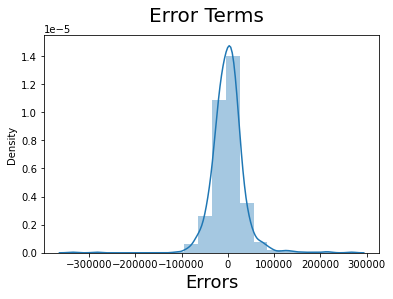

In [324]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [325]:
# Evaluate R Square
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.79

In [326]:
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1319091993595.4429
1291960816.4499931
35943.85644932932


In [327]:
y_res = (y_train - y_train_cnst)

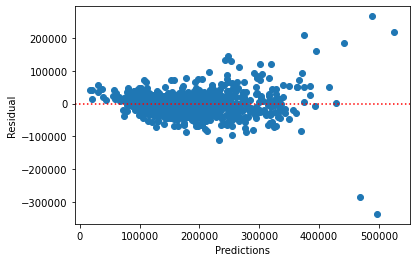

In [328]:
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

In [329]:
# Prediction and Evaluation on Test Data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,...,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,0,0
382,0.427132,-0.120835,0.648310,-0.532073,1.020432,-0.558025,1.051361,0.577925,1.236276,-1.226909,...,0,1,0,0,0,0,0,0,1,0
1170,0.291260,-0.059203,-0.066511,0.384025,-0.387685,-0.558025,-0.699764,-0.533302,1.236276,0.665348,...,0,1,0,0,0,0,0,0,0,0


In [330]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008671,0.014903,-0.016637,-0.019148,-0.024379,-0.021652,0.033702,-0.110963,-0.074960,...,0.002278,0.610478,0.015945,0.052392,0.004556,0.255125,0.054670,0.054670,0.314351,0.398633
std,0.991429,0.891711,0.961406,1.063263,1.008023,0.878475,1.018493,0.909956,0.933225,0.988361,...,0.047727,0.488198,0.125407,0.223070,0.067420,0.436429,0.227594,0.227594,0.464786,0.490176
min,-2.199712,-0.891969,-3.640619,-3.280366,-1.698692,-0.558025,-2.450888,-3.866981,-0.653302,-1.699973,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.433386,-0.267006,-0.781333,-0.532073,-0.921799,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.025773,-0.108217,-0.066511,-0.532073,0.389207,-0.558025,-0.699764,0.577925,-0.653302,0.192284,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.472422,0.117445,0.648310,0.384025,0.923321,0.371218,1.051361,0.577925,0.291487,1.138412,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,11.025086,14.414233,2.792775,3.132319,1.214656,4.360551,2.802485,1.689151,2.181065,1.138412,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [331]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [332]:
X_train_new.columns

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'MSSubClass_75',
       'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_190', 'LotShape_IR3',
       'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco',
       'Exterior2nd_Wd Shng', 'Foundation_Stone', 'GarageType_CarPort'],
      dtype='object')

In [333]:
# Use the model for prediction
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [334]:
test_lm = sm.OLS(y_test,X_test_new).fit()

In [335]:
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     85.30
Date:                Wed, 22 May 2024   Prob (F-statistic):          1.70e-141
Time:                        23:01:05   Log-Likelihood:                -5197.3
No. Observations:                 439   AIC:                         1.044e+04
Df Residuals:                     415   BIC:                         1.054e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.761e+05   2042.574     86.222      0.000    1.72e+05     1.8e+05
OverallQual           3.001e+04   2693.124     11.143      0.000    2.47e+04    3.53e+04
1stFlrSF              3.278e+04   2558.465     12.814      0.000    2.78e+04    3.78e+04
2ndFlrSF              2.364e+04   2122.835     11.135      0.000    1.95e+04    2.78e+04
GarageYrBlt           4137.2146   1842.867      2.245      0.025     514.697    7759.732
MSSubClass_75        -1.792e+04   1.49e+04     -1.206      0.228   -4.71e+04    1.13e+04
MSSubClass_90        -2.232e+04   1.15e+04     -1.938      0.053    -4.5e+04     313.374
MSSubClass_160       -3.281e+04   9922.329     -3.307      0.001   -5.23e+04   -1.33e+04
MSSubClass_190       -1.018e+04   1.58e+04     -0.643      0.521   -4.13e+04    2.09e+04
LotShape_IR3         -3401.2080   3.48e+04     -0.098      0.922   -7.19e+04    6.51e+04
LotConfig_FR3        -5.405e+04   3.56e+04     -1.518      0.130   -1.24e+05     1.6e+04
Neighborhood_ClearCr  7880.1039   1.27e+04      0.622      0.534    -1.7e+04    3.28e+04
Neighborhood_NoRidge  4.235e+04   1.53e+04      2.769      0.006    1.23e+04    7.24e+04
Neighborhood_NridgHt  8.111e+04   9570.723      8.475      0.000    6.23e+04    9.99e+04
Neighborhood_Somerst  1.195e+04   7632.109      1.566      0.118   -3050.724     2.7e+04
Neighborhood_StoneBr   8.78e+04    1.1e+04      7.989      0.000    6.62e+04    1.09e+05
Neighborhood_Veenker -1.987e-11   1.22e-11     -1.628      0.104   -4.39e-11    4.12e-12
Exterior1st_BrkComm   2.094e-11   2.13e-11      0.982      0.327    -2.1e-11    6.29e-11
Exterior1st_BrkFace    727.6340   8050.791      0.090      0.928   -1.51e+04    1.66e+04
Exterior1st_ImStucc  -7.705e-12   7.28e-12     -1.058      0.291    -2.2e-11    6.61e-12
Exterior1st_Stone     3.261e-12   4.86e-12      0.671      0.503    -6.3e-12    1.28e-11
Exterior2nd_Brk Cmn   1.682e+04   2.62e+04      0.642      0.521   -3.47e+04    6.83e+04
Exterior2nd_CmentBd   1.598e+04   7979.154      2.002      0.046     291.829    3.17e+04
Exterior2nd_ImStucc   3.732e+04   2.58e+04      1.445      0.149   -1.35e+04    8.81e+04
Exterior2nd_Stucco   -4136.7419   1.43e+04     -0.290      0.772   -3.22e+04    2.39e+04
Exterior2nd_Wd Shng   2.554e+04   1.45e+04      1.763      0.079   -2931.818     5.4e+04
Foundation_Stone     -3.082e+04   2.05e+04     -1.507      0.133    -7.1e+04    9385.276
GarageType_CarPort     924.1047   2.52e+04      0.037      0.971   -4.87e+04    5.05e+04
==============================================================================
Omnibus:                       81.519   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.464
Skew:                           0.586   Prob(JB):                    7.99e-120
Kurtosis

In [336]:
y_pred = lm.predict(X_test_new)

In [337]:
# Calcualte R Square of test model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.78

In [338]:
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

608146506221.9828
1385299558.592216
37219.61255295676


In [339]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [340]:
#check VIf
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.37
1,1stFlrSF,1.97
20,Exterior2nd_Brk Cmn,1.81
16,Exterior1st_BrkComm,1.73
2,2ndFlrSF,1.54
6,MSSubClass_160,1.39
12,Neighborhood_NridgHt,1.27
13,Neighborhood_Somerst,1.27
11,Neighborhood_NoRidge,1.22
22,Exterior2nd_ImStucc,1.17


Text(0, 0.5, 'y_pred')

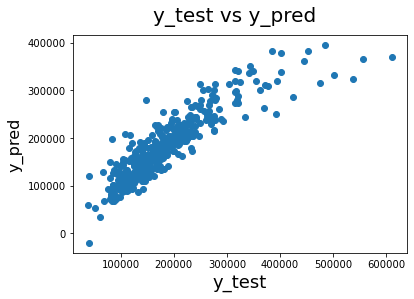

In [341]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)          
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16) 

In [342]:
X_train_new.columns

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'MSSubClass_75',
       'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_190', 'LotShape_IR3',
       'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco',
       'Exterior2nd_Wd Shng', 'Foundation_Stone', 'GarageType_CarPort'],
      dtype='object')

In [343]:
final_df = df[['OverallQual', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'MSSubClass_75',
       'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_190', 'LotShape_IR3',
       'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Stucco',
       'Exterior2nd_Wd Shng', 'Foundation_Stone', 'GarageType_CarPort']]
final_df.head()

,OverallQual,1stFlrSF,2ndFlrSF,GarageYrBlt,MSSubClass_75,MSSubClass_90,MSSubClass_160,MSSubClass_190,LotShape_IR3,LotConfig_FR3,...,Exterior1st_BrkFace,Exterior1st_ImStucc,Exterior1st_Stone,Exterior2nd_Brk Cmn,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Stucco,Exterior2nd_Wd Shng,Foundation_Stone,GarageType_CarPort
0,7,856,854,2003.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,1262,0,1976.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,920,866,2001.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,961,756,1998.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8,1145,1053,2000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [344]:
y_pred_train = lm.predict(X_train_lm)

y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.793305914520467
0.7847821440337125
1319091993595.4429
608146506221.9828
1291960816.4499931
1385299558.592216


In [345]:
# Ridge Regression

In [346]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [347]:
print(model_cv.best_params_)

{'alpha': 9.0}


In [348]:
#Fitting Ridge model for alpha = 9 and printing coefficients which have been penalised
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 33789.64894003  29065.59672359  19276.29195174   2095.95419527
 -15127.6651859  -17317.64843457 -27037.08497956 -12019.91745769
  -8980.28256686  -4929.04216226  19602.64046145  47079.37786504
  44803.9016903   21836.68689214  14153.53562312  19970.58588244
  -6419.25499648  10075.60181281  -3794.75016312  -2253.62801342
  -1134.01329507   8873.8931028   11078.35665577 -22179.33770145
 -15599.36203786   1017.55435553  -4369.84083045]


In [349]:
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7871278280438502
0.7819359720446679
1358519654953.7183
616189005964.7343
1330577526.8890483
1403619603.5643148


In [350]:
# Lasso Regression

In [351]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [352]:
print(model_cv.best_params_)

{'alpha': 100}


In [353]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train)

Lasso(alpha=100)

In [354]:
lasso.coef_

array([ 32530.97716249,  28417.86574278,  19243.91797885,   1961.72445514,
       -16482.61391693, -18431.84809096, -32308.01651507, -12378.54063317,
        -3642.7721796 ,     -0.        ,  24695.37474199,  59938.25452847,
        54028.18354513,  27248.39790921,  20240.74927017,  29393.82964583,
           -0.        ,  10033.74513342,     -0.        ,     -0.        ,
           -0.        ,   8737.46685425,   9202.25218257, -25899.48224383,
       -17013.52763519,      0.        ,     -0.        ])

In [355]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7899531836740311
0.7832078626509704
1340488640751.3284
612594992702.932
1312917375.858304
1395432785.2003007


In [356]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),7.933059e-01,7.871278e-01,7.899532e-01
1,R2 Score (Test),7.847821e-01,7.819360e-01,7.832079e-01
2,RSS (Train),1.319092e+12,1.358520e+12,1.340489e+12
3,RSS (Test),6.081465e+11,6.161890e+11,6.125950e+11
4,MSE (Train),3.594386e+04,3.647708e+04,3.623420e+04
5,MSE (Test),3.721961e+04,3.746491e+04,3.735549e+04


In [357]:
# Regularization

In [358]:
betas = pd.DataFrame(index=X.columns)

In [359]:
betas.rows = X.columns

In [360]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [361]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Linear,Ridge,Lasso
OverallQual,30981.385777,33789.648940,32530.977162
1stFlrSF,28367.940641,29065.596724,28417.865743
2ndFlrSF,19938.158415,19276.291952,19243.917979
GarageYrBlt,1916.590582,2095.954195,1961.724455
MSSubClass_75,-26264.571327,-15127.665186,-16482.613917
MSSubClass_90,-21648.686323,-17317.648435,-18431.848091
MSSubClass_160,-38990.569576,-27037.084980,-32308.016515
MSSubClass_190,-17617.633656,-12019.917458,-12378.540633
LotShape_IR3,-13927.764752,-8980.282567,-3642.772180
LotConfig_FR3,-21929.353143,-4929.042162,-0.000000


In [362]:
betas['Lasso'].sort_values(ascending=False)[:5]

Neighborhood_NoRidge    59938.254528
Neighborhood_NridgHt    54028.183545
OverallQual             32530.977162
Neighborhood_Veenker    29393.829646
1stFlrSF                28417.865743
Name: Lasso, dtype: float64

In [363]:
# Double the values of alpha for ridge and lasso and check
#earlier for Ridge alpha = 9 now take 18
alpha = 18
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 35081.21185471  29336.12684167  18854.67756846   2231.68581053
 -10659.1407127  -14553.03643275 -21566.45391734  -9205.34653516
  -6598.86645439  -2611.00756889  14769.88843422  37768.94984092
  36873.85516574  16782.45894788   8741.91564198  13244.4684329
  -3396.57428726   7759.25022305  -1478.77507479  -1516.32486081
  -1623.52077676   7288.1740359    7335.03435529 -17280.18794254
 -12637.99400778     45.83394473  -3044.22385406]
0.7808532040945325
0.778624926992987


In [364]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 33809.7981622   28535.3404964   18430.87204175   2057.23643189
  -6410.90052988 -15187.38621407 -27555.22014215  -7399.38540993
     -0.             -0.          19909.60247161  56501.68732661
  49362.16689079  23049.76793277  10001.31687104  19329.36718966
     -0.           6211.74685998     -0.             -0.
     -0.           5971.02233829      0.         -21200.42885
 -13846.94929935      0.             -0.        ]
0.7858549734836423
0.7783320859010456


In [365]:
betas = pd.DataFrame(index=X.columns)

In [366]:
betas.rows = X.columns

In [367]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [368]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Ridge,Lasso
OverallQual,35081.211855,33809.798162
1stFlrSF,29336.126842,28535.340496
2ndFlrSF,18854.677568,18430.872042
GarageYrBlt,2231.685811,2057.236432
MSSubClass_75,-10659.140713,-6410.900530
MSSubClass_90,-14553.036433,-15187.386214
MSSubClass_160,-21566.453917,-27555.220142
MSSubClass_190,-9205.346535,-7399.385410
LotShape_IR3,-6598.866454,-0.000000
LotConfig_FR3,-2611.007569,-0.000000


In [369]:
betas['Ridge'].sort_values(ascending=False)[:5]

Neighborhood_NoRidge    37768.949841
Neighborhood_NridgHt    36873.855166
OverallQual             35081.211855
1stFlrSF                29336.126842
2ndFlrSF                18854.677568
Name: Ridge, dtype: float64

In [370]:
betas['Lasso'].sort_values(ascending=False)[:5]

Neighborhood_NoRidge    56501.687327
Neighborhood_NridgHt    49362.166891
OverallQual             33809.798162
1stFlrSF                28535.340496
Neighborhood_Somerst    23049.767933
Name: Lasso, dtype: float64

In [371]:
# Drop the top 5 features and rebuild
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '1stFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [372]:
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '1stFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [373]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [374]:
print(model_cv.best_params_)

{'alpha': 100}


In [375]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train)

Lasso(alpha=100)

In [390]:
lasso.coef_

array([ 27118.78532176,  15148.17010813, -28663.02361658, -27450.08908218,
       -85276.92482817, -37693.4299207 ,   7820.29151917,     -0.        ,
        23958.1701715 ,  54238.16279153,  81525.73130653, -39878.81308747,
        39808.1937464 ,      0.        ,  45221.54688549,      0.        ,
        42270.20723723,  47575.2690276 , -33905.54698069, -17542.94810676,
           -0.        , -33361.42221452])

In [383]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.27306627047507104
0.3361056556373745


In [391]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.27306627047507104
0.3361056556373745
4639186749181.36
1875982939296.2114
4543767628.972929
4273309656.711188


In [392]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),7.933059e-01,7.871278e-01,2.730663e-01
1,R2 Score (Test),7.847821e-01,7.819360e-01,3.361057e-01
2,RSS (Train),1.319092e+12,1.358520e+12,4.639187e+12
3,RSS (Test),6.081465e+11,6.161890e+11,1.875983e+12
4,MSE (Train),3.594386e+04,3.647708e+04,6.740747e+04
5,MSE (Test),3.721961e+04,3.746491e+04,6.537056e+04


In [396]:
X_train_new.columns

Index(['2ndFlrSF', 'GarageYrBlt', 'MSSubClass_75', 'MSSubClass_90',
       'MSSubClass_160', 'MSSubClass_190', 'LotShape_IR3', 'LotConfig_FR3',
       'Neighborhood_ClearCr', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng',
       'Foundation_Stone', 'GarageType_CarPort'],
      dtype='object')

In [397]:
# Ridge

In [398]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [399]:
print(model_cv.best_params_)

{'alpha': 3.0}


In [400]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 27021.46034687  15251.59295876 -29711.24157604 -27704.22560574
 -80699.64488396 -37090.98567484  14355.79401714  -4054.23494213
  25435.58402169  51924.69710332  72227.57481046 -35532.6174519
  38948.1216065   14163.39656393  38418.99023495  -2319.25920077
  42110.17747153  41955.19996514 -34011.81471102 -19267.26118287
  -3403.3907797  -33657.47844163]


In [401]:
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.27216322926048586
0.32857845623914383
4644949828629.34
1897252735871.0234
4549412172.996415
4321760218.385019


In [402]:
# Lasso

In [403]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [404]:
print(model_cv.best_params_)

{'alpha': 100}


In [405]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train)

Lasso(alpha=100)

In [406]:
lasso.coef_

array([ 27118.78532176,  15148.17010813, -28663.02361658, -27450.08908218,
       -85276.92482817, -37693.4299207 ,   7820.29151917,     -0.        ,
        23958.1701715 ,  54238.16279153,  81525.73130653, -39878.81308747,
        39808.1937464 ,      0.        ,  45221.54688549,      0.        ,
        42270.20723723,  47575.2690276 , -33905.54698069, -17542.94810676,
           -0.        , -33361.42221452])

In [415]:
X_train_new.columns

Index(['2ndFlrSF', 'GarageYrBlt', 'MSSubClass_75', 'MSSubClass_90',
       'MSSubClass_160', 'MSSubClass_190', 'LotShape_IR3', 'LotConfig_FR3',
       'Neighborhood_ClearCr', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc',
       'Exterior1st_Stone', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng',
       'Foundation_Stone', 'GarageType_CarPort'],
      dtype='object')